In [1]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [2]:
dicom_file = pydicom.dcmread('/kaggle/input/siim-medical-images/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')

In [3]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 430
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088218367595492

In [4]:
dicom_file[0x0028, 0x0010]

(0028,0010) Rows                                US: 512

In [5]:
dicom_file.Rows

512

In [6]:
ct = dicom_file.pixel_array
ct.shape

(512, 512)

In [7]:
type(ct)

numpy.ndarray

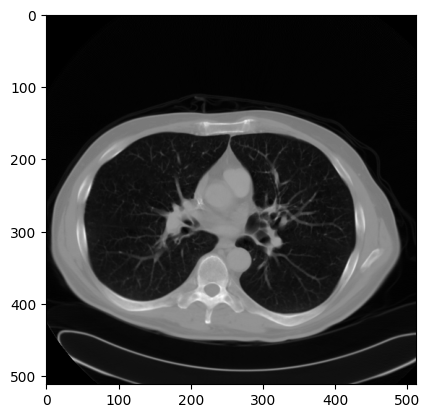

In [8]:
plt.figure()
plt.imshow(ct, cmap='gray')

In [9]:
path_to_head_mri = Path('/kaggle/input/siim-medical-images/dicom_dir')
all_files = path_to_head_mri.glob('*')

In [10]:
type(all_files)

generator

In [11]:
all_files

<generator object Path.glob at 0x7d6a30800ba0>

In [12]:
mri_data = []

for path in all_files:
    data = pydicom.dcmread(path)
    mri_data.append(data)

In [13]:
for slice in mri_data[:5]:
    print(slice.SliceLocation)

-155
-755
-948.2
-795.030
-506.850006


In [14]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation)

In [15]:
for slice in mri_data_ordered[:5]:
    print(slice.SliceLocation)

-1168.4
-948.5
-948.2
-918.5
-901


In [16]:
full_volume = []

for slice in mri_data_ordered:
    full_volume.append(slice.pixel_array)

In [17]:
full_volume[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

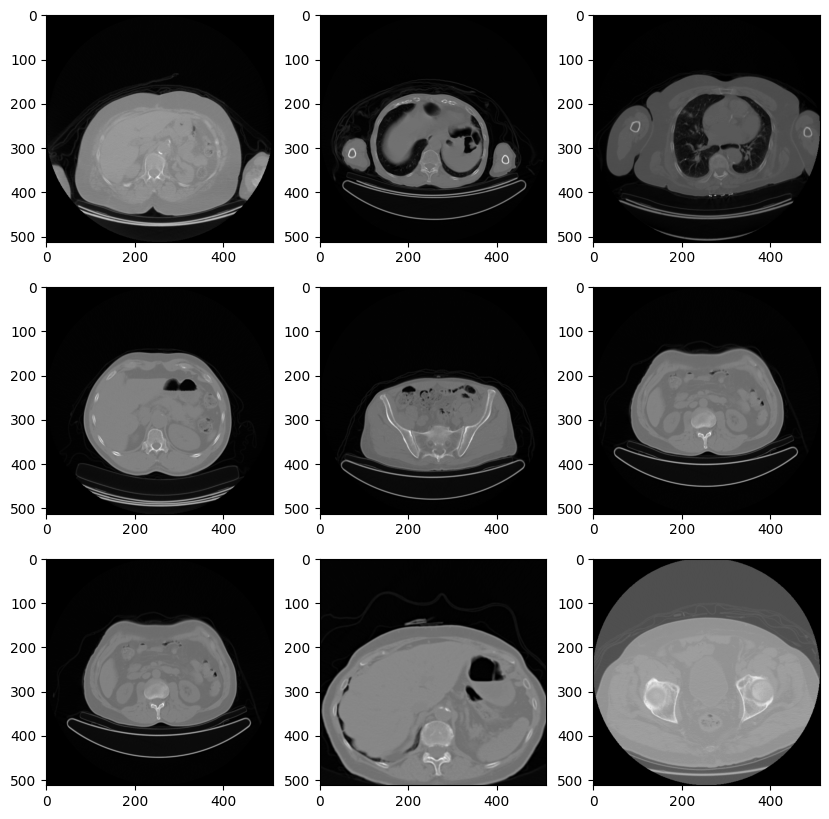

In [18]:
fig, axis = plt.subplots(3,3,figsize=(10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[slice_counter],cmap='gray')
        slice_counter+=1

In [19]:
import SimpleITK as sitk

In [20]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.6.1.4.1.14519.5.2.1.3023.4012.102289758600639081883682341599', '1.3.6.1.4.1.14519.5.2.1.3023.4012.111970507245102440072981773069', '1.3.6.1.4.1.14519.5.2.1.3023.4012.154470741269083988898569715734', '1.3.6.1.4.1.14519.5.2.1.3023.4012.251486101984782457779149100338', '1.3.6.1.4.1.14519.5.2.1.3023.4012.281222452204153314922270968637', '1.3.6.1.4.1.14519.5.2.1.3023.4012.297267439816180432188742253053', '1.3.6.1.4.1.14519.5.2.1.3023.4012.513523794062613324810980652054', '1.3.6.1.4.1.14519.5.2.1.3023.4012.648531603410109839170055154074', '1.3.6.1.4.1.14519.5.2.1.3023.4012.695837418985624676340861607694', '1.3.6.1.4.1.14519.5.2.1.6450.4012.153444090734536905415278769671', '1.3.6.1.4.1.14519.5.2.1.6450.4012.175016803370372621275285549100', '1.3.6.1.4.1.14519.5.2.1.6450.4012.185965196167856618864777448062', '1.3.6.1.4.1.14519.5.2.1.6450.4012.200234714530375524999580843628', '1.3.6.1.4.1.14519.5.2.1.6450.4012.249320450296411760831322037482', '1.3.6.1.4.1.14519.5.2.1.6450.4012.288687105792

In [21]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri),series_ids[0])

In [22]:
type(series_file_names)

tuple

In [23]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [24]:
image_data = series_reader.Execute()

In [25]:
head_mri = sitk.GetArrayFromImage(image_data)

In [26]:
head_mri.shape

(1, 512, 512)

In [27]:
# fig, axis = plt.subplots(3,3,figsize=(10,10))

# slice_counter = 0
# for i in range(3):
#     for j in range(3):
#         axis[i][j].imshow(head_mri[slice_counter],cmap='gray')
#         slice_counter+=1